In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from tools.config import opt
from lib.VGG16.faster_rcnn_vgg16 import FasterRCNNVGG16
from lib.cascade.trainer import FasterRCNNTrainer
from tools.util import  read_image
from tools.vis_tool import vis_bbox, predict
from tools import array_tool as at
from IPython.core.debugger import Tracer
%matplotlib inline

In [2]:
img = read_image('data/000001.jpg')
img = t.from_numpy(img)[None]

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

In [4]:
trainer.load('/home/wrc/fasterrcnn_0.712.pth')

FasterRCNNTrainer(
  (faster_rcnn): FasterRCNNVGG16(
    (extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16)

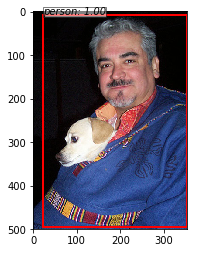

In [5]:
#_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True)
_bboxes, _labels, _scores = predict(img, model=trainer.faster_rcnn, specific_label=['person'])
vis_bbox(at.tonumpy(img[0]),
         _bboxes[0],
         _labels[0],
         _scores[0])

In [7]:
_bboxes

[[array([ 99.895966,  43.742744, 415.62668 , 174.69885 ], dtype=float32),
  array([ 94.02606, 413.5224 , 394.6587 , 552.8059 ], dtype=float32),
  array([123.98037, 408.13538, 222.9885 , 456.61652], dtype=float32)]]

In [15]:
bb = _bboxes[0][0]

In [16]:
bb

array([ 99.895966,  43.742744, 415.62668 , 174.69885 ], dtype=float32)

In [17]:
bb[0]

99.895966

In [18]:
import cv2

In [31]:
ii = cv2.imread("data/1.jpg")

In [32]:
cv2.rectangle(ii,(bb[1],bb[0]),(bb[3],bb[2]),(255,0,0))

array([[[ 0,  2,  1],
        [ 8,  8,  8],
        [ 3,  1,  1],
        ...,
        [ 3,  4,  2],
        [ 4,  2,  2],
        [ 4,  0,  5]],

       [[ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  1,  1],
        [ 3,  0,  2]],

       [[ 2,  2,  2],
        [10,  8,  8],
        [28, 26, 26],
        ...,
        [ 4,  3,  5],
        [ 1,  1,  1],
        [ 5,  0,  1]],

       ...,

       [[ 0,  2,  0],
        [ 0,  3,  1],
        [ 8, 11,  9],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 6,  9,  7],
        ...,
        [ 0,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 2,  4,  4],
        [10, 12, 12],
        ...,
        [ 0,  1,  1],
        [ 2,  2,  2],
        [ 1,  1,  1]]], dtype=uint8)

In [33]:
cv2.imwrite("tst.jpg",ii)

True

In [34]:
_labels

[[14, 14, 14]]

In [35]:
type(img)

torch.FloatTensor

In [37]:
_bboxes

[[array([ 99.895966,  43.742744, 415.62668 , 174.69885 ], dtype=float32),
  array([ 94.02606, 413.5224 , 394.6587 , 552.8059 ], dtype=float32),
  array([123.98037, 408.13538, 222.9885 , 456.61652], dtype=float32)]]

In [39]:
len(_bboxes[0])

3

In [7]:
img.shape

torch.Size([1, 3, 500, 353])